### This is an EDA on titanic dataset. We will understand the dataset as a whole and also treat the missing values.


##Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Importing the Dataset

In [ ]:
titanic_df = pd.read_csv("titanic-data.csv")

##Explore the dataset

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#df.describe give statistical information and numerical columns of dataset

titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Find the total number of missing values / null values

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Dealing with missing values

# It appears from the dataset, columns "Cabin", "Embarked" and "Age" have a couple of mising values.

In [ ]:
#Cabin column

cabin_df = titanic_df["Cabin"]
cabin_df

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Find the percentage of missing values for the column "Cabin"

percentage_missing_cabin = (cabin_df.isnull().sum()/len(titanic_df))*100

percentage_missing_cabin

77.10437710437711

In [ ]:
#It appears the column "Cabin" has about 77% of missing data. Hence in this scenario we shall go with dropping this column entirely.

titanic_df.drop(columns=["Cabin"], inplace=True)



In [ ]:
# Check if the previous result was successful

titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#Embark column has 2 missing values, go ahead with treating the same.

embarked_df = titanic_df["Embarked"]
embarked_df.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
embarked_df.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embarked_df.isnull().sum()

2

In [ ]:
# 644 is the total value for category "S"
#891 is the total count

print(644/891)

0.7227833894500562


In [ ]:
#Replace missing values in embarked coulmn with the output "S" as it's percentage is high.

titanic_df["Embarked"].fillna("S",inplace=True)

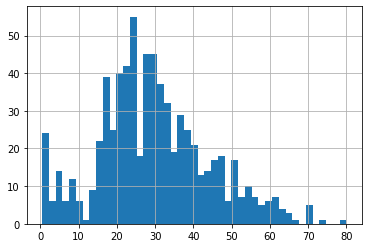

In [ ]:
#To treat misisng values for "Age", let us categorize as per gender by grouping them together first.

titanic_df["Age"].hist(bins=45)

In [ ]:
#Replace missing value using fillna() function as shown below

age_df = titanic_df[["Age","Sex"]]

In [ ]:
age_df["Age"] = age_df.groupby("Sex").transform(lambda x: x.fillna(x.mean()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f020bbbedd0>]],
      dtype=object)

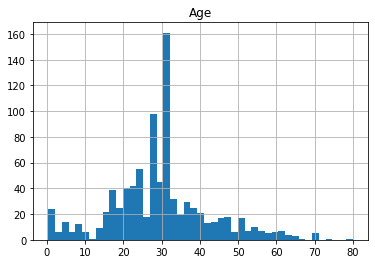

In [ ]:
age_df.hist(bins=45)

In [ ]:
# The histogram shows no much difference in the result even after replacing the missing "age" values with the mean. 
#It goes same if we replaced with median too.
# Both the above methods add unwantted patterns.
# We can go ahead with relevant machine learning models to explore further